# Model Kurma 

In [1]:
import pandas as pd
hitters = pd.read_csv("hitters.csv")
#Bu veri seti basketbol amerikan basketbol ligindeki bazı oyuncularlar ilgili bilgileri içermektedir.
df = hitters.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
df.isnull().values.any()

True

In [3]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
df = df.dropna()
#eksik gözlemleri sildik

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [7]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
#kategorik değişkenleri dummy yöntemi ile ayırdık.Fakat bazı değişkenlerin birbirini ifade etmesi ile ilgili olan dummy değişken tuzağına dikkat edilmelidir.
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [87]:
y = df["Salary"]

In [9]:
x = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [10]:
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [11]:
x = pd.concat([x,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


## Test-Train Ayırma 

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.25,random_state = 42)
training = df.copy()

In [13]:
from sklearn.decomposition import PCA
pca = PCA()

## Değişkenlere İndirgeme Uygulama 

In [14]:
from sklearn.preprocessing import scale
x_indirgenmiş = pca.fit_transform(scale(x_train)) 
#fit_transformda fiti de kullanarak model şekline dönüştürme(daha sonra lineer regresyon uygulamamız gerekecek) ve transform ile de içindeki scale  ile ise de boyut indirgeme ile veri setindeki ilişkinin azaltılması sağlanıyor.
#Değişken sayısı vermediğimiz için default olarak değişken sayısı ile aynı olarak aldı sadece gözlemelerdeki sayıları aralarında korelasyon olmayacak şekilde ve veri setini en iyi anlatacak şekilde değiştirdi.
#İstediğimiz değişken sayısı da verilebilir.

In [15]:
x_indirgenmiş[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [16]:
x_indirgenmiş.shape

(197, 19)

In [17]:
import numpy as np
np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
#Burda değişkenlerin kendinden önceki değişkenlerle birlikte veri setinin ilk halinin varyansının %kaçını açıkladığını görebiliyoruz.
#Yani ilk değişken tek başına yüzde 38'ini ilk ve ikinci değişken yüzde 59'unu tamamı yüzde 99.99'unun varyansını açıklayabiliyormuş

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28, 98.01, 98.68, 99.18, 99.49, 99.74, 99.9 , 99.96, 99.98,
       99.99])

## İndirgenmiş Veri Setine Model Kurma 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
pcr_model = lm.fit(x_indirgenmiş,y_train)

In [20]:
pcr_model.intercept_#formüldeki sabit

543.4834416243655

In [21]:
pcr_model.coef_#değişkenlerin katsayıları

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

# TAHMİN 

In [22]:
y_tahmin = pcr_model.predict(x_indirgenmiş)

In [23]:
y_tahmin[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_train,y_tahmin))

289.3292825564977

In [25]:
df["Salary"].mean()

535.9258821292775

In [26]:
r2_score(y_train,y_tahmin)

0.5770075250410178

In [27]:
pca2 = PCA()
x_indirgenmiş_test = pca2.fit_transform(scale(x_test))
#test veri setini de indirgememiz gerek

In [28]:
y_tahmin_test = pcr_model.predict(x_indirgenmiş_test)

In [29]:
np.sqrt(mean_squared_error(y_test,y_tahmin_test))

405.1575364149964

In [30]:
r2_score(y_test,y_tahmin_test)

0.2417046364031329

# Model Tuning 

PCR modelinde tuning yapmamız gereken değer değişken sayısıdır.İndirgeme yaptığımız değişken sayısını hata oranını en aza indirecek değere getirmemiz gerekmektedir.

In [31]:
lm = LinearRegression()
pcr_model = lm.fit(x_indirgenmiş[:,0:1],y_train)
y_tahmin_test = pcr_model.predict(x_indirgenmiş_test[:,0:1])
np.sqrt(mean_squared_error(y_test,y_tahmin_test))

392.3893558949346

In [32]:
lm = LinearRegression()
pcr_model = lm.fit(x_indirgenmiş[:,0:2],y_train)
y_tahmin_test = pcr_model.predict(x_indirgenmiş_test[:,0:2])
np.sqrt(mean_squared_error(y_test,y_tahmin_test))

396.38761247967653

In [33]:
lm = LinearRegression()
pcr_model = lm.fit(x_indirgenmiş[:,0:9],y_train)
y_tahmin_test = pcr_model.predict(x_indirgenmiş_test[:,0:9])
np.sqrt(mean_squared_error(y_test,y_tahmin_test))

390.7635628207545

Burda farklı değişken sayılarında modelimizi kurduğumuzda farklı hata değerleri aldığımız görülmektedir.Buna göre en uygun değişken sayısını bulmak için cross validation yöntemi kullanılabilir.

In [34]:
from sklearn import model_selection


In [35]:
cv = model_selection.KFold(n_splits = 10,shuffle = True,random_state = 1)
#n_split değeri cross validationı kaç katlı yapacağımızı gösterir.
#shuffle ise gruplara ayrılmadan önce verilerin karıştırılıp karıştırılmayacağını ifade eder.

In [57]:
rmse = []

In [58]:
for i in np.arange(1,x_indirgenmiş.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,x_indirgenmiş[:,:i],
                                                       y_train.ravel(),cv = cv,
                                                      scoring = "neg_mean_squared_error").mean())
    rmse.append(score)

In [59]:
import matplotlib.pyplot as plt


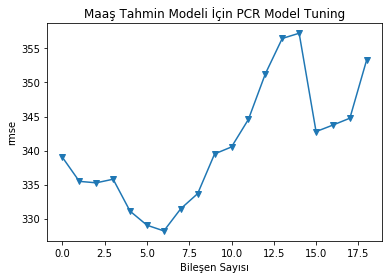

In [60]:
plt.plot(rmse,'-v')
plt.xlabel("Bileşen Sayısı")
plt.ylabel("rmse")
plt.title("Maaş Tahmin Modeli İçin PCR Model Tuning");

In [69]:
#yukarıdaki grafikten görüldüğü gibi 7 değerinde hatamız minimum olduğu için veri setimizdeki değişken sayısını 7 olarak ayarlamamız en az hatayı alırız.
lm = LinearRegression()
pcr_model = lm.fit(x_indirgenmiş[:,0:7],y_train)

In [70]:
y_tahmin = pcr_model.predict(x_indirgenmiş[:,0:7])

In [71]:
np.sqrt(mean_squared_error(y_train,y_tahmin))

306.97762986673075

In [84]:
y_tahmin_test = pcr_model.predict(x_indirgenmiş_test[:,0:7])

In [85]:
np.sqrt(mean_squared_error(y_test,y_tahmin_test))

391.9374992765452

In [74]:
r2_score(y_test,y_tahmin_test)

0.2903827048163259

In [75]:
r2_score(y_train,y_tahmin)

0.5238307804728823

Test üzerinden cross validation yaparsak da test hatasını azaltabiliriz fakat modeli train veri setinden kuracağımız için test üzerinden cross validation yapmamız overfitting oranını arttırabilir.Yani bizim hata oranımız az görünse bile farklı veri setlerinde oranımız çok düşer.

In [91]:
rmse2 = []
for i in np.arange(1,x_indirgenmiş_test.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,x_indirgenmiş_test[:,:i],
                                                      y_test.ravel(),cv = cv,
                                                      scoring = "neg_mean_squared_error").mean())
    rmse2.append(score)

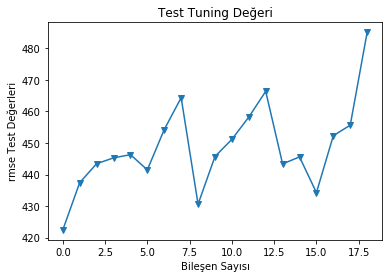

In [92]:
plt.plot(rmse2,"-v")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("rmse Test Değerleri")
plt.title("Test Tuning Değeri");

In [93]:
pcr_model = lm.fit(x_indirgenmiş[:,:9],y_train)
y_tahmin_test = pcr_model.predict(x_indirgenmiş_test[:,:9])
np.sqrt(mean_squared_error(y_test,y_tahmin_test))

390.7635628207545

In [94]:
r2_score(y_test,y_tahmin_test)

0.29462724910879123

In [96]:
y_tahmin = pcr_model.predict(x_indirgenmiş[:,:9])

In [97]:
np.sqrt(mean_squared_error(y_train,y_tahmin))

306.44800211226544